In [9]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')

/var/folders/43/5lj7tsms4q1dq44ykfhnkplm0000gn/T/ipykernel_25821/4165190455.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


In [2]:
def get_piano_notes():   
    # White keys are in Uppercase and black keys (sharps) are in lowercase
    octave = ['C', 'c', 'D', 'd', 'E', 'F', 'f', 'G', 'g', 'A', 'a', 'B'] 
    base_freq = 440 #Frequency of Note A4
    keys = np.array([x+str(y) for y in range(0,9) for x in octave])
    # Trim to standard 88 keys
    start = np.where(keys == 'A0')[0][0]
    end = np.where(keys == 'C8')[0][0]
    keys = keys[start:end+1]
    
    note_freqs = dict(zip(keys, [2**((n+1-49)/12)*base_freq for n in range(len(keys))]))
    note_freqs[''] = 0.0 # stop
    return note_freqs

In [6]:
def get_sine_wave(frequency, duration, sample_rate=44100, amplitude=4096):
    t = np.linspace(0, duration, int(sample_rate*duration)) # Time axis
    wave = amplitude*np.sin(2*np.pi*frequency*t)
    return wave

def get_saw_wave(frequency, duration, sample_rate=44100, amplitude=4096):
    sawtooth = lambda t: 2 * (t - np.floor(0.5 + t))
    t = np.linspace(0, duration, int(sample_rate*duration)) # Time axis
    wave = amplitude*sawtooth(2*np.pi*frequency*t)
    return wave

In [12]:
# Get middle C frequency
note_freqs = get_piano_notes()
frequency = note_freqs['C4']

# Pure sine wave
sine_wave = get_sine_wave(frequency, duration=2, amplitude=2048)
wavfile.write('pure_c.wav', rate=44100, data=sine_wave.astype(np.int16))

# Saw wave
saw_wave = get_saw_wave(frequency, duration=2, amplitude=512)
wavfile.write('saw_c.wav', rate=44100, data=saw_wave.astype(np.int16))

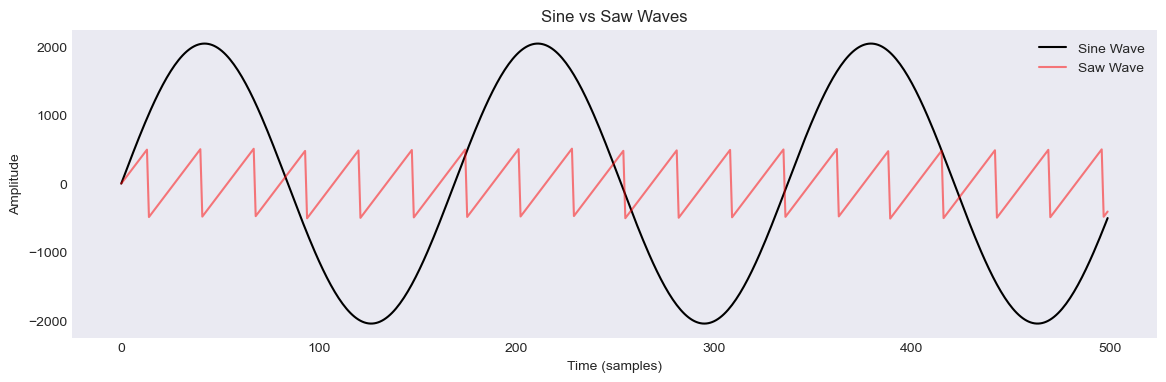

In [13]:
# Plot the waves
plt.figure(figsize=(14, 4))
plt.plot(sine_wave[:500], color='black')
plt.plot(saw_wave[:500], color='red', alpha=0.5)
plt.legend(['Sine Wave', 'Saw Wave'])
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Sine vs Saw Waves')
plt.show()

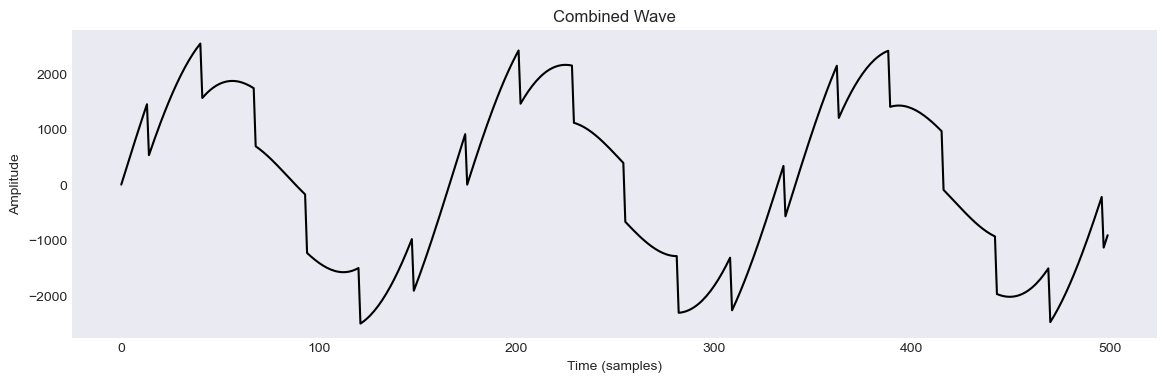

In [14]:
# combine the waves
combined_wave = sine_wave + saw_wave
wavfile.write('combined_c.wav', rate=44100, data=combined_wave.astype(np.int16))

# Plot the combined wave
plt.figure(figsize=(14, 4))
plt.plot(combined_wave[:500], color='black')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Combined Wave')
plt.show()